<a href="https://colab.research.google.com/github/marunfaiv/machine_learning/blob/main/clustering_with_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import drive

import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Data Cleaning
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = data.drop(['bmi'], axis=1) # drop bmi karena terdapat missing value
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [ ]:
# membuang data yang kurang variatif
print("Variabel Gender: ", len(data['gender'].unique()))
print("Variabel hypertension: ", len(data['hypertension'].unique()))
print("Variabel heart_disease: ", len(data['heart_disease'].unique()))
print("Variabel ever_married: ", len(data['ever_married'].unique()))
print("Variabel work_type: ", len(data['work_type'].unique()))
print("Variabel residence type: ", len(data['Residence_type'].unique()))
print("Variabel smoking status: ", len(data['smoking_status'].unique()))

data.drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type'], axis=1, inplace=True)

Variabel Gender:  3
Variabel hypertension:  2
Variabel heart_disease:  2
Variabel ever_married:  2
Variabel work_type:  5
Variabel residence type:  2
Variabel smoking status:  4


In [ ]:
data.drop(['stroke'], axis=1, inplace = True) #dihapus karena akan predict stroke

In [ ]:
data.drop(['smoking_status'], axis=1, inplace = True)

In [ ]:
data.drop(['id'], axis=1, inplace = True)

In [ ]:
data.head()

,age,avg_glucose_level
0,67.0,228.69
1,61.0,202.21
2,80.0,105.92
3,49.0,171.23
4,79.0,174.12


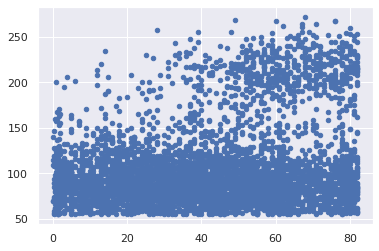

In [ ]:
plt.scatter(data['age'], data['avg_glucose_level'], s=20)
plt.style.use("ggplot")

In [ ]:
# Scaling data
scaler = StandardScaler()
scaler.fit(data)

data_scaled = scaler.transform(data)

In [ ]:
data = pd.DataFrame(data_scaled, columns=['age', 'avg_glucose_level'])
data

,age,avg_glucose_level
0,1.051434,2.706375
1,0.786070,2.121559
2,1.626390,-0.005028
3,0.255342,1.437358
4,1.582163,1.501184
...,...,...
5105,1.626390,-0.494658
5106,1.670617,0.420775
5107,-0.363842,-0.511443
5108,0.343796,1.328257


In [ ]:
data = data[np.all(np.isfinite(data), axis=1)]
data

,age,avg_glucose_level
0,1.051434,2.706375
1,0.786070,2.121559
2,1.626390,-0.005028
3,0.255342,1.437358
4,1.582163,1.501184
...,...,...
5105,1.626390,-0.494658
5106,1.670617,0.420775
5107,-0.363842,-0.511443
5108,0.343796,1.328257


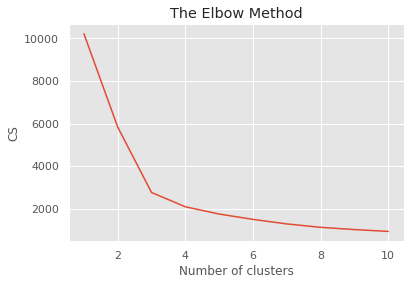

In [ ]:
# Memakai Elbow Method untuk mengetahui berapa clusters yang terbaik
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
model = KMeans(n_clusters=2)
# model
y_predicted = model.fit_predict(data[['age', 'avg_glucose_level']])

data['stroke'] = y_predicted
data['stroke']

0       1
1       1
2       0
3       1
4       1
       ..
5105    0
5106    1
5107    0
5108    1
5109    0
Name: stroke, Length: 5110, dtype: int32

In [ ]:
len(data['stroke'].unique())

2

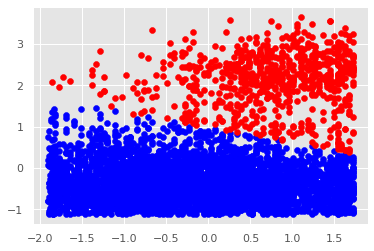

In [ ]:
data1 = data[data.stroke==0]
data2 = data[data.stroke==1]
# data3 = data[data.stroke==2]

plt.scatter(data1.age, data1.avg_glucose_level, color='blue')
plt.scatter(data2.age, data2.avg_glucose_level, color='red')
# plt.scatter(data3.age, data3.avg_glucose_level, color='blue')

plt.style.use("ggplot")

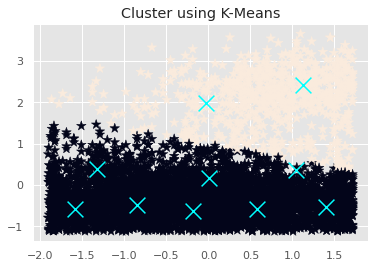

In [ ]:
plt.scatter(data['age'], data['avg_glucose_level'], s = 100, c = data.stroke, marker = "*", alpha = 1, )

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='cyan', s=250, alpha=1, marker='x')

plt.title("Cluster using K-Means")
plt.show()

In [ ]:
# Diagram Pie
f1 = len(data1)
f2 = len(data2)
f = len(data)

def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage)

a = percentage(f1, f)
b = percentage(f2, f)

print(a+"%")
print(b+"%")

85.30332681017613%
14.696673189823874%


([<matplotlib.patches.Wedge at 0x7fd955dec750>,
 [Text(-0.9848214892461654, 0.49002717712282556, 'Sehat'),
  Text(0.984821558065639, -0.49002703881435705, 'Stroke')])

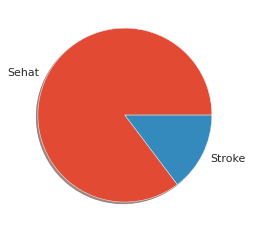

In [ ]:
data_pie = [a, b]
choices = ['Sehat', 'Stroke']

plt.pie(data_pie, labels = choices, shadow = True)

In [ ]:
# check correct label
labels = model.labels_
correct_labels = sum(y_predicted == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_predicted.size))

Result: 5110 out of 5110 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_predicted.size)))

Accuracy score: 1.00
